In [23]:
from typing import Dict, TypedDict, List
import math
from langgraph.graph import StateGraph 

In [28]:
class AgentState(TypedDict):
    values: List[int]
    operation: str
    name: str
    result: str


In [29]:
def process_values(state: AgentState) -> AgentState:
    """A simple node that processes a list of integers based on user prefernce of addition or multiplication"""
    if state["operation"] == "add":
        state["result"] = f"Hey {state['name']}! The sum of your values is {sum(state['values'])}"
    elif state["operation"] == "multiply":
        state["result"] = f"Hey {state['name']}! The product of your values is {math.prod(state['values'])}"
    

    return state

In [30]:
graph = StateGraph(AgentState)

graph.add_node("ValueProcessor", process_values)
graph.set_entry_point("ValueProcessor")
graph.set_finish_point("ValueProcessor")
app = graph.compile()



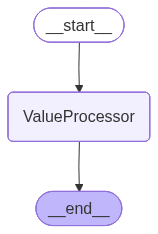

In [31]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

answer = app.invoke({"values": [1,2,3,4], "operation": "multiply", "name":"Steve"})

In [32]:
print(answer["result"])

Hey Steve! The product of your values is 24
